In [421]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
##
import os
import sys

sys.path.append('../')
import visuals

print(sys.path)

_datadir = "./reversible/"
_output = "../images/"

['/Users/kumiori3/Documents/WIP/Nature/paper_UMUT/data', '/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/Users/kumiori3/Library/Python/3.11/lib/python/site-packages', '/opt/homebrew/lib/python3.11/site-packages', '../', '../', '../']


## Energy plot

In [422]:
def load_data(file_path):
    try:
        return np.loadtxt(file_path)
    except IOError as e:
        print(f"Error loading file {file_path}: {e}")
        return None

def process_data(data):
    size_list = np.size(data[:, 0])
    stability_current = data[0, 2]
    load_1 = np.array([data[0, 0]])
    energy_1 = np.array([data[0, 1]])
    
    for ind_e in range(size_list):
        load_t = data[ind_e, 0]
        if -stability_current == data[ind_e, 2] or ind_e == (size_list - 1):
            load_mean = (data[ind_e - 1, 0] + data[ind_e, 0]) / 2
            e_mean = (data[ind_e - 1, 1] + data[ind_e, 1]) / 2
            # print('np.array([%.10f, %.10f])' % (load_mean, e_mean))
            if np.size(load_1) > 1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current == 1:
                ax0.plot(load_1, energy_1, c='C0', linewidth=3)
            elif stability_current == -1:
                ax0.plot(load_1, energy_1, c='C1', linewidth=3)
            stability_current = data[ind_e, 2]
            load_1 = np.array(load_mean)
            energy_1 = np.array(e_mean)
            # ax0.axvline(load_1)
        else:
            load_1 = np.append(load_1, data[ind_e, 0])
            energy_1 = np.append(energy_1, data[ind_e, 1])

def find_energy_jumps(energy_series, threshold = .001):
    """
    Find indices where the energy series has jumps greater than the given threshold.

    Parameters:
    energy_series (np.array): A NumPy array representing the energy time series.
    threshold (float): The threshold to detect jumps.

    Returns:
    list: Indices where the jumps exceed the threshold.
    """
    # Compute the differences between consecutive elements
    diffs = np.diff(energy_series)
    
    # Find indices where the absolute value of the difference exceeds the threshold
    jump_indices = np.where(np.abs(diffs) > threshold)[0]
    
    # Add 1 to the indices because np.diff reduces the array length by 1
    jump_indices += 1
    
    return jump_indices.tolist()

def plot_arrow(point_xy, la_temp):
    ax0.scatter(point_xy[0], point_xy[1], s=120, facecolors='none', edgecolors='k', zorder=3)
    dx = 0.0
    dy = -la_temp
    w_a = 0.7*0.02
    h_w = 0.7*0.08
    h_l = 0.7*0.0008
    if la_temp>0:
        ax0.arrow(point_xy[0], point_xy[1]-0.00023, dx, dy, facecolor='k', 
                head_width = h_w, head_length = h_l, width = w_a, 
                edgecolor='none', lw=circle_edge_size, zorder=3)
        # plt.arrow(point_xy[0], point_xy[1]-0.0001, 0.0, -0.0003, facecolor='w', 
        #         head_width = 0, head_length = 0, width = w_a-0.01, 
        #         edgecolor='none', lw=circle_edge_size, zorder=3)
        ax0.scatter(point_xy[0], point_xy[1]-la_temp-h_l-0.0003, s=120, facecolors='none', edgecolors='k', zorder=3)


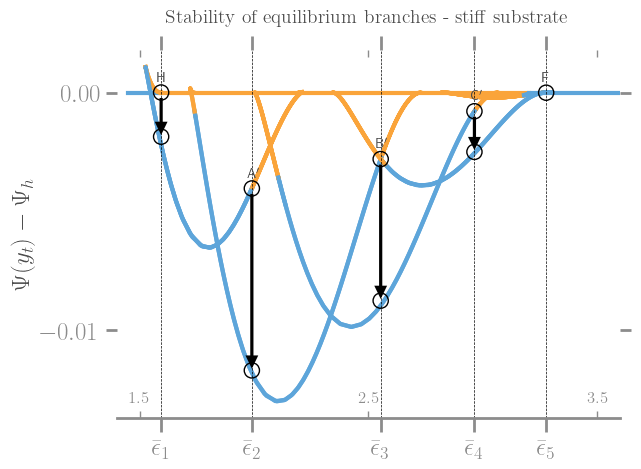

In [447]:

# fig = plt.figure()
# gs = GridSpec(5,3, width_ratios=[6, 1, 1]) # 2 rows, 3 columns
# ax0 = fig.add_subplot(gs[:,0]) # Energy 

fig, ax0 = plt.subplots()

list_auto = np.array([1, 2, 3, 4, 10, 8])
for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    file_path = os.path.join(_datadir, f'model_1_{ind_p}.txt')
    data = load_data(file_path)
    if data is not None:
        process_data(data)
#-------------------------------------------
## plotting circles
circle_edge_size = 2
## H
H_point = np.array([1.5937969925, 0.0000000000])
A_prime_point = np.array([1.9904599557, -0.0040393529])
B_prime_point = np.array([2.5537152245, -0.0028032125])
C_prime_point = np.array([2.9635757174, -0.0007895701])
F_point = np.array([3.2771690558, -7.9311e-06])
length_arrow = 0.001



plot_arrow(H_point, length_arrow)
# ax0.text(H_point[0]-0.03, H_point[1]+0.0004, '$\mathsf H$')
## A_prime
length_arrow = 0.0068
plot_arrow(A_prime_point, length_arrow)
# ax0.text(A_prime_point[0]-0.05, A_prime_point[1]+0.0003, '$\mathsf A\'$')
## B_prime
length_arrow = 0.0051
plot_arrow(B_prime_point, length_arrow)
# ax0.text(B_prime_point[0]-0.055, B_prime_point[1]+0.001, '$\mathsf B\'$')
## C_prime
length_arrow = 0.00085
plot_arrow(C_prime_point, length_arrow)
# ax0.text(C_prime_point[0]-0.1, C_prime_point[1]-0.0005, '$\mathsf C\'$')
## F
length_arrow = -1
plot_arrow(F_point, length_arrow)
# ax0.text(F_point[0]-0.03, F_point[1]+0.0003, '$\mathsf F$')



points_list = [H_point, A_prime_point, B_prime_point, C_prime_point, F_point]
ax0.set_xticks([point[0] for point in points_list],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(points_list)+1)]])
ax0.tick_params(axis='x', which='major', direction='out', length=10, width=2)

ax0.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
ax0.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)

ax0.set_yticks([-.01, 0])
ax0.set_xlim(1.4, 3.6)
ax0.set_ylabel('$\Psi(y_t) - \Psi_h$')

for point in points_list:
    # ax0.scatter(point[0], point[1], s=120, facecolors='g', edgecolors='k', zorder=3)
    ax0.axvline(point[0], color='k', linestyle='--', linewidth=0.5)
    
for point, label in zip(points_list, ['$\mathsf H$', '$\mathsf A\'$', '$\mathsf B\'$', '$\mathsf C\'$', '$\mathsf F$']):
    ax0.text(point[0]-.02, point[1]+0.0005, label)
ax0.set_title('Stability of equilibrium branches - stiff substrate', fontsize=14, pad=20)
plt.tight_layout()
visuals.setspines0()
plt.savefig(os.path.join(_output, 'model_stiff_energy.png'), dpi=300)

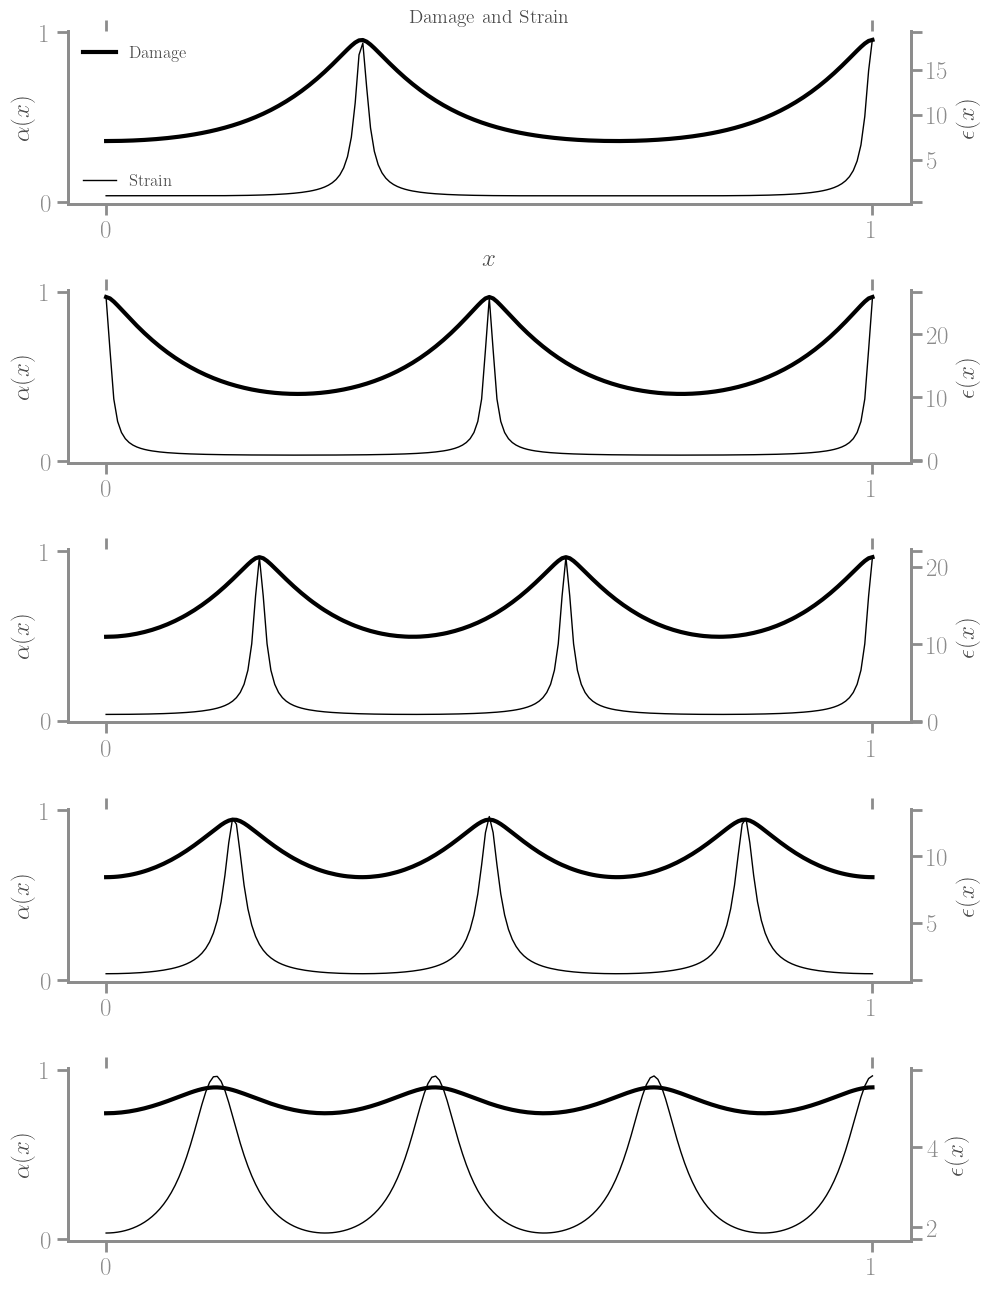

In [424]:
# gs = GridSpec(1, 2, width_ratios=[1, 1]) # 2 rows, 3 columns

list_auto = np.array([2, 3, 4, 10, 8]) 
fig, axes = plt.subplots(len(list_auto), 1, figsize=(10, 13))



for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    # print(ind_p, ind_pt)
    # Plot_alpha(ind_p, axes[0], 12)
    # Plot_epsilon(ind_p, axes[1], 12)
    data_alpha = load_data(os.path.join(_datadir, f'model_1_min_energy_x_vs_alpha_{ind_p}.txt'))
    data_eps = load_data(os.path.join(_datadir, f'model_1_min_energy_x_vs_epsilon_{ind_p}.txt'))
    # np.loadtxt('model_1_min_energy_x_vs_alpha_%d.txt' %ind_p)
    axes[ind_pt].plot(data_alpha[:, 0], data_alpha[:, 1], c='k', lw=3, label=f'Damage')
    # axes[ind_pt, 1].plot(data_eps[:, 0], data_eps[:, 1], c='C1', lw=3)
    eps_ax = axes[ind_pt].twinx()
    eps_ax.plot(data_eps[:, 0], data_eps[:, 1], c='k', lw=1, label=f'Strain')
    if ind_pt == 0:
        axes[ind_pt].set_title('Damage and Strain', fontsize=14)
        eps_ax.legend(loc='lower left')
        axes[ind_pt].set_xlabel('$x$')
        
    axes[ind_pt].set_ylim([-0.01, 1.01])
    # axes[ind_pt, 1].set_ylim([-0.01, 1.01])
    axes[ind_pt].set_xticks([0, 1])
    axes[ind_pt].set_yticks([0, 1])
    axes[ind_pt].set_ylabel('$\\alpha(x)$')
    eps_ax.set_ylabel('$\\epsilon(x)$')
    # eps_ax.set_yticks([0, 1])

axes[0].legend()

visuals.setspines2()
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

plt.savefig(os.path.join(_output, 'model_stiff_fields.png'), dpi=300)



## Model: compliant substrate

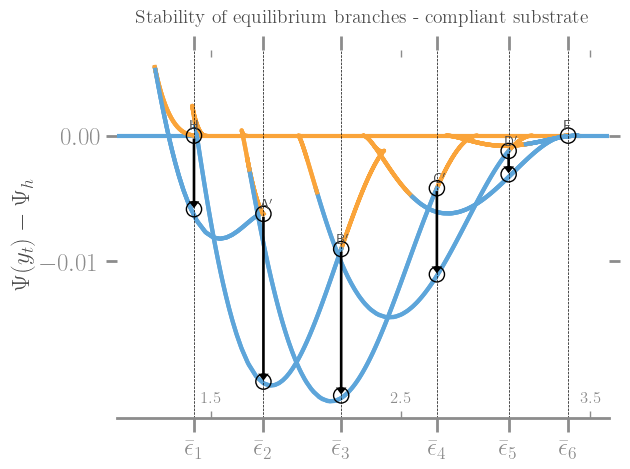

In [448]:

# fig = plt.figure()
# gs = GridSpec(5,3, width_ratios=[6, 1, 1]) # 2 rows, 3 columns
# ax0 = fig.add_subplot(gs[:,0]) # Energy 

fig, ax0 = plt.subplots()

list_auto = np.array([1, 2, 3, 4, 6, 7, 9]) 
for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    file_path = os.path.join(_datadir, f'model_2_{ind_p}.txt')
    data = load_data(file_path)
    if data is not None:
        process_data(data)
#-------------------------------------------
## plotting circles
circle_edge_size = 2
## H
H_point = np.array([1.42785571145-0.02, 0.0000000000])
A_prime_point = np.array([1.7747393522000001, -0.0062324497])
B_prime_point = np.array([2.1855120281, -0.0090345641])
C_prime_point = np.array([2.6912294867, -0.00418862405])
D_prime_point = np.array([3.0703009444, -0.0012200307])
F_point = np.array([3.3847598835, -4.785e-08])
length_arrow = 0.001



length_arrow = 0.005
plot_arrow(H_point, length_arrow)

length_arrow = 0.0125
plot_arrow(A_prime_point, length_arrow)

length_arrow = 0.0108
plot_arrow(B_prime_point, length_arrow)

# length_arrow = 0.00085
# plot_arrow(C_prime_point, length_arrow)

length_arrow = 0.006
plot_arrow(C_prime_point, length_arrow)

length_arrow = 0.001
plot_arrow(D_prime_point, length_arrow)

length_arrow = -1
plot_arrow(F_point, length_arrow)


points_list = [H_point, A_prime_point, B_prime_point, C_prime_point, D_prime_point, F_point]
    
# points_list = [H_point, A_prime_point, B_prime_point, C_prime_point, F_point]
ax0.set_xticks([point[0] for point in points_list],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(points_list)+1)]])
ax0.tick_params(axis='x', which='major', direction='out', length=10, width=2)

ax0.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
ax0.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)

ax0.set_yticks([-.01, 0])
ax0.set_xlim(1., 3.6)

for point in points_list:
#     # ax0.scatter(point[0], point[1], s=120, facecolors='g', edgecolors='k', zorder=3)
    ax0.axvline(point[0], color='k', linestyle='--', linewidth=0.5)
    
for point, label in zip(points_list, ['$\mathsf H$', '$\mathsf A\'$', '$\mathsf B\'$', '$\mathsf C\'$', '$\mathsf D\'$', '$\mathsf F$']):
    ax0.text(point[0]-.02, point[1]+0.0005, label)

ax0.set_title('Stability of equilibrium branches - compliant substrate', fontsize=14, pad=20)
ax0.set_ylabel('$\Psi(y_t) - \Psi_h$')

visuals.setspines0()
plt.tight_layout()

plt.savefig(os.path.join(_output, 'model_compliant_energy.png'), dpi=300)


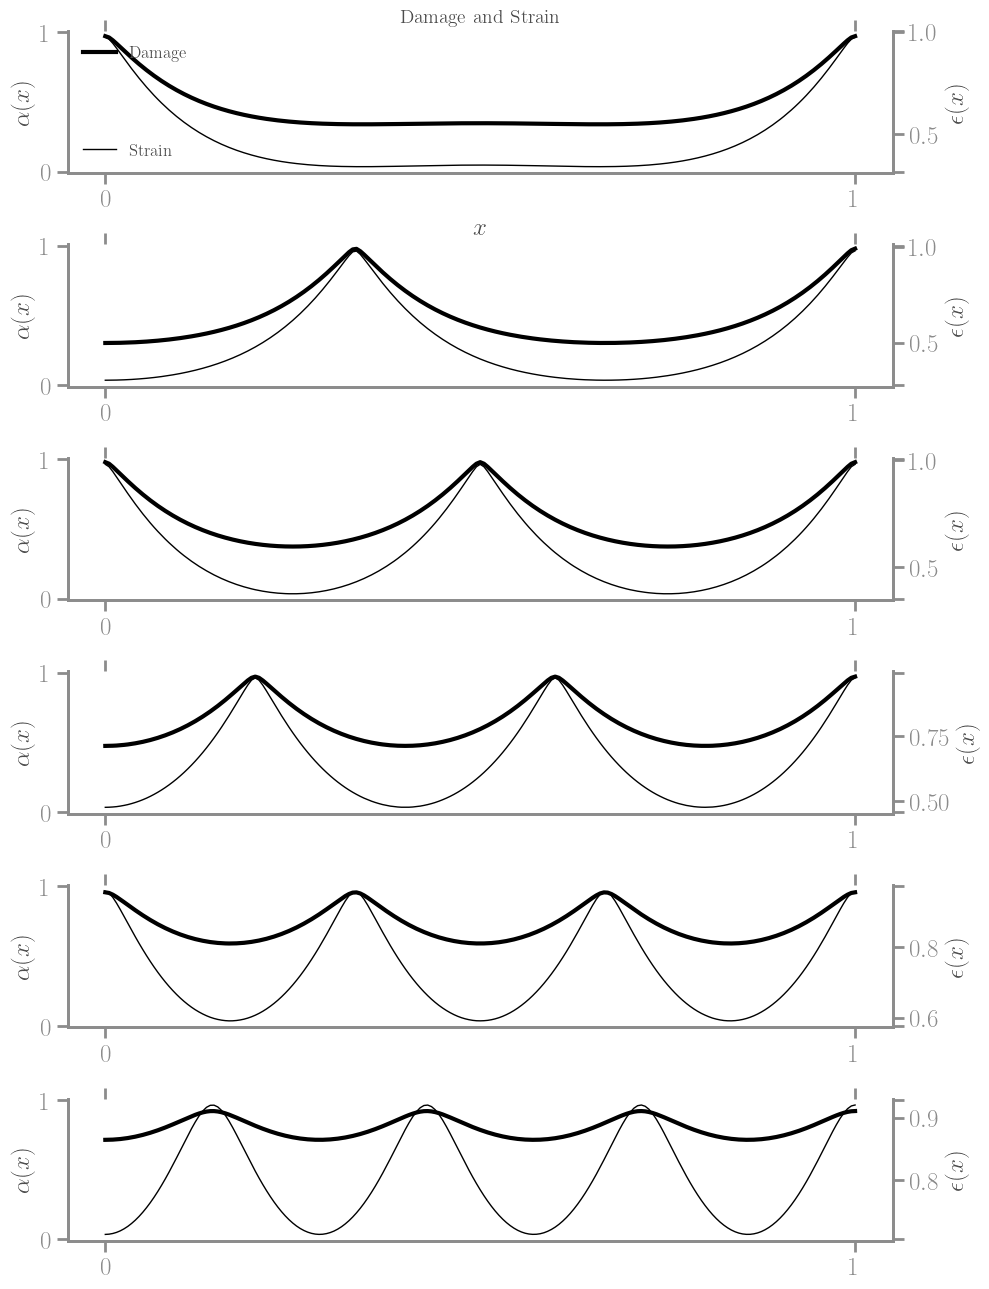

In [426]:
# gs = GridSpec(1, 2, width_ratios=[1, 1]) # 2 rows, 3 columns

list_auto = np.array([2, 3, 4, 6, 7, 9]) 
fig, axes = plt.subplots(len(list_auto), 1, figsize=(10, 13))

for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    # print(ind_p, ind_pt)
    # Plot_alpha(ind_p, axes[0], 12)
    # Plot_epsilon(ind_p, axes[1], 12)
    data_alpha = load_data(os.path.join(_datadir, f'model_2_min_energy_x_vs_alpha_{ind_p}.txt'))
    data_eps = load_data(os.path.join(_datadir, f'model_2_min_energy_x_vs_epsilon_{ind_p}.txt'))
    axes[ind_pt].plot(data_alpha[:, 0], data_alpha[:, 1], c='k', lw=3, label=f'Damage')
    eps_ax = axes[ind_pt].twinx()
    eps_ax.plot(data_eps[:, 0], data_eps[:, 1], c='k', lw=1, label=f'Strain')
    if ind_pt == 0:
        axes[ind_pt].set_title('Damage and Strain', fontsize=14)
        eps_ax.legend(loc='lower left')
        axes[ind_pt].set_xlabel('$x$')
        axes[ind_pt].legend(loc='upper left')
        
        
    axes[ind_pt].set_ylim([-0.01, 1.01])
    # axes[ind_pt, 1].set_ylim([-0.01, 1.01])
    axes[ind_pt].set_xticks([0, 1])
    axes[ind_pt].set_yticks([0, 1])
    axes[ind_pt].set_ylabel('$\\alpha(x)$')
    eps_ax.set_ylabel('$\\epsilon(x)$')
    # eps_ax.set_yticks([0, 1])


visuals.setspines2()
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

plt.savefig(os.path.join(_output, 'model_compliant_fields.png'), dpi=300)



## Spectra

0

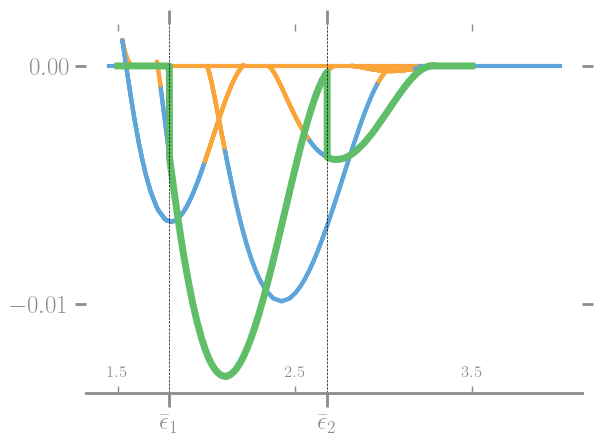

In [298]:
list_auto = np.array([1, 2, 3, 4, 10, 8]) 

fig, axes = plt.subplots(1, 1)


for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    
    data = load_data(os.path.join(_datadir, f'model_1_{ind_p}.txt'))
    size_list = np.size(data[:, 0])
    stability_current  = data[0, 2]
    load_1 = np.array([data[0, 0]])
    energy_1 = np.array([data[0, 1]])
    for ind_e in range(size_list):
        load_t = data[ind_e, 0]
        #e_0_list[ind_e] = load_t*load_t/(2.0 + load_t*load_t) + (rs/2.0)*load_t*load_t
        if -stability_current==data[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data[ind_e - 1, 0] + data[ind_e, 0])/2
            e_mean = (data[ind_e - 1, 1] + data[ind_e, 1])/2
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                axes.plot(load_1, energy_1, c='C0', linewidth=3)
            elif stability_current==-1:
                axes.plot(load_1, energy_1, c='C1', linewidth=3)
            stability_current  = data[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data[ind_e, 0])
            energy_1 = np.append(energy_1, data[ind_e, 1])







# data_load = np.loadtxt('list_672_load.txt')
file_path = os.path.join(_datadir, f'list_672_load.txt')
data_load = load_data(file_path)
num_points = np.size(data_load, 0)
energy_list = np.zeros(num_points)
for ind_pl in range(num_points):
    load = data_load[ind_pl, 0]
    e0 = load*load/(2.0 + load*load)
    energy_list[ind_pl] = data_load[ind_pl, 1] - e0
axes.plot(data_load[:, 0], energy_list, c='C2', linewidth=5)

jump_indices = find_energy_jumps(energy_list)
[axes.axvline(data_load[idx, 0], color='k', linestyle='--', linewidth=0.5) for idx in jump_indices]


axes.set_xticks([point for point in data_load[jump_indices, 0]],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(data_load[jump_indices, 0])+1)]])
axes.tick_params(axis='x', which='major', direction='out', length=10, width=2)

axes.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
axes.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)
axes.set_yticks([-.01, 0])
# axes.set_xlim(1., 3.6)

visuals.setspines0()

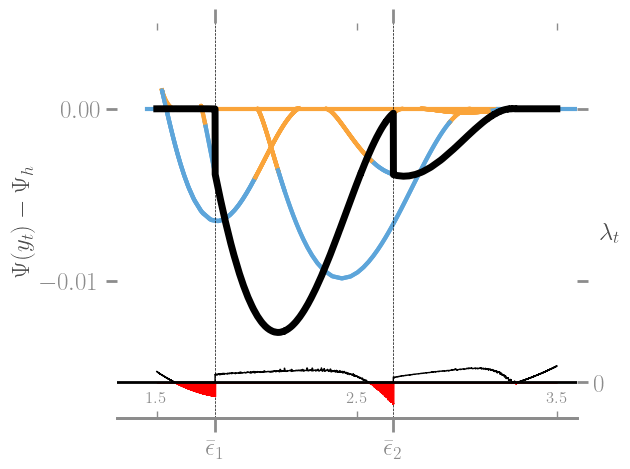

In [442]:
list_auto = np.array([1, 2, 3, 4, 10, 8]) 

fig, axes = plt.subplots(1, 1)


for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    
    data = load_data(os.path.join(_datadir, f'model_1_{ind_p}.txt'))
    size_list = np.size(data[:, 0])
    stability_current  = data[0, 2]
    load_1 = np.array([data[0, 0]])
    energy_1 = np.array([data[0, 1]])
    for ind_e in range(size_list):
        load_t = data[ind_e, 0]
        #e_0_list[ind_e] = load_t*load_t/(2.0 + load_t*load_t) + (rs/2.0)*load_t*load_t
        if -stability_current==data[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data[ind_e - 1, 0] + data[ind_e, 0])/2
            e_mean = (data[ind_e - 1, 1] + data[ind_e, 1])/2
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                axes.plot(load_1, energy_1, c='C0', linewidth=3)
            elif stability_current==-1:
                axes.plot(load_1, energy_1, c='C1', linewidth=3)
            stability_current  = data[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data[ind_e, 0])
            energy_1 = np.append(energy_1, data[ind_e, 1])







# data_load = np.loadtxt('list_672_load.txt')
file_path = os.path.join(_datadir, f'list_672_load.txt')
data_load = load_data(file_path)
num_points = np.size(data_load, 0)
energy_list = np.zeros(num_points)
for ind_pl in range(num_points):
    load = data_load[ind_pl, 0]
    e0 = load*load/(2.0 + load*load)
    energy_list[ind_pl] = data_load[ind_pl, 1] - e0
axes.plot(data_load[:, 0], energy_list, c='k', linewidth=5)

jump_indices = find_energy_jumps(energy_list)
[axes.axvline(data_load[idx, 0], color='k', linestyle='--', linewidth=0.5) for idx in jump_indices]


axes.set_xticks([point for point in data_load[jump_indices, 0]],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(data_load[jump_indices, 0])+1)]])
axes.tick_params(axis='x', which='major', direction='out', length=10, width=2)

axes.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
axes.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)
axes.set_yticks([-.01, 0])
axes.set_ylim(-.018,.005)
axes.set_xlim(1.3,3.6)


axes.set_ylabel('$\Psi(y_t) - \Psi_h$')

as_spectrum = axes.twinx()
file_path = os.path.join(_datadir, f'load_vs_eigenvalue0_model_1.txt')
data_eig = load_data(file_path)
as_spectrum.plot(data_eig[:, 0], np.maximum(data_eig[:, 1], 0), c='k', lw=1)
as_spectrum.fill_between(data_eig[:, 0], np.minimum(data_eig[:, 1], 0), color='r')
as_spectrum.axhline(0, c='k', linestyle='-')
as_spectrum.set_yticks([0])
as_spectrum.set_ylim([-0.001, .01])

as_spectrum.set_ylabel('$\lambda_t$', rotation="horizontal")

# as_spectrum.yaxis.set_label_coords(.95, 0.25)

as_spectrum.set_title('Stability of equilibrium branches - compliant substrate', fontsize=14, pad=20)

# visuals.setspines2()
visuals.setspines0()
plt.tight_layout()

plt.savefig(os.path.join(_output, 'model_stiff_energy_kick.png'), dpi=300)


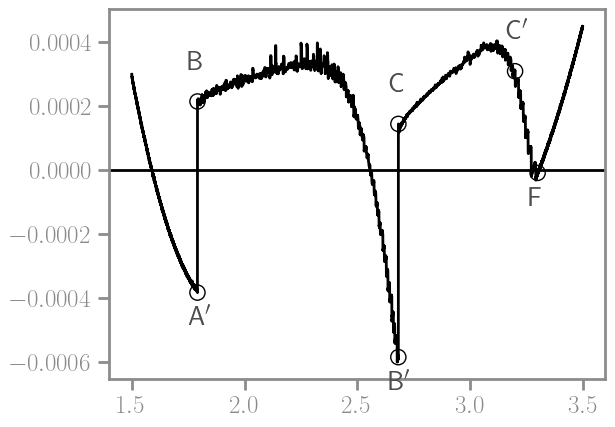

In [428]:
list_auto = np.array([1, 2, 3, 4, 10, 8]) 

fig, axis = plt.subplots(1, 1)

file_path = os.path.join(_datadir, f'load_vs_eigenvalue0_model_1.txt')
data_eig = load_data(file_path)
axis.plot(data_eig[:, 0], data_eig[:, 1], c='k')
axis.axhline(0, c='k', linestyle='-')
index_list = [1456, 1457, 5911, 5912, 8500, 9000]
list_letter = ['A\'', 'B', 'B\'', 'C', 'C\'', 'F']
delta_x = [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04]
delta_y = [-0.0002, 0.0001, -0.0002, 0.0001, 0.0001, -0.0002]
delta_x = -0.04
delta_y = -0.0001
for ind_j in range(len(index_list)):
    ind = index_list[ind_j]
    axis.scatter(data_eig[ind, 0], data_eig[ind, 1], s=120, facecolors='none', edgecolors='k', zorder=3)
    axis.text(data_eig[ind, 0]+delta_x, data_eig[ind, 1]-np.sign(data_eig[ind, 1])*delta_y, f'$\mathsf {list_letter[ind_j]}$', fontsize=20)
plt.savefig(os.path.join(_output, 'model_stiff_spectrum.png'), dpi=300)


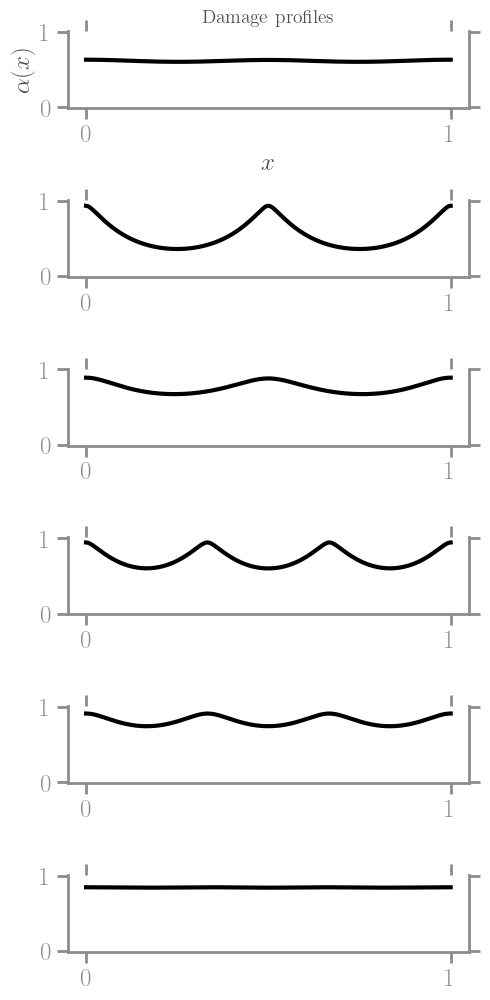

In [436]:
data_jumps = load_data(os.path.join(_datadir, 'jumps_alpha_model_1.txt'))
_cols = len(data_jumps[0, :])

fig, axis = plt.subplots(_cols-1, 1, figsize=(5, 10))

for ind_col in range(1,_cols):
    axis[ind_col-1].plot(data_jumps[:, 0], data_jumps[:, ind_col], c='k', lw=3)
    axis[ind_col-1].set_ylim([-0.01, 1.01])
    axis[ind_col-1].set_yticks([0, 1])
    axis[ind_col-1].set_xticks([0, 1])
    if ind_col == 1:
        axis[0].set_xlabel('$x$')
        axis[0].set_ylabel('$\\alpha(x)$')
# ax_A1.plot(data_jumps[:, 0], data_jumps[:, 1], c='C0')
# ax_A1.text(0.03, 0.01, 'A\'', fontsize=20)
# ##
# ax_A2.plot(data_jumps[:, 0], data_jumps[:, 2], c='C0')
# ax_A2.text(0.03, 0.01, 'B', fontsize=20)
# ##
# ax_A3.plot(data_jumps[:, 0], data_jumps[:, 3], c='C0')
# ax_A3.text(0.03, 0.01, 'B\'', fontsize=20)
# ##
# ax_A4.plot(data_jumps[:, 0], data_jumps[:, 4], c='C0')
# ax_A4.text(0.03, 0.01, 'C', fontsize=20)
# ##
# ax_A5.plot(data_jumps[:, 0], data_jumps[:, 5], c='C0')
# ax_A5.text(0.03, 0.01, 'C\'', fontsize=20)
# ##
# ax_A6.plot(data_jumps[:, 0], data_jumps[:, 6], c='C0')
# ax_A6.text(0.03, 0.01, 'F', fontsize=20)
visuals.setspines2()

plt.tight_layout()
axis[0].set_title('Damage profiles', fontsize=14)
plt.savefig(os.path.join(_output, 'model_stiff_profiles.png'), dpi=300)



## Model: compliant substrate

(1.0, 3.6)

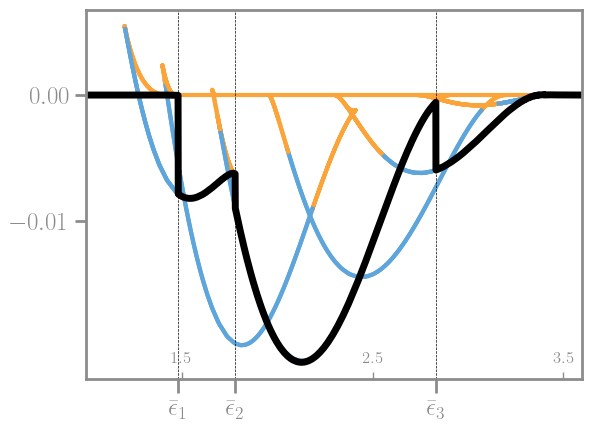

In [394]:
list_auto = np.array([1, 2, 3, 4, 6, 7, 9]) 

fig, axes = plt.subplots(1, 1)

for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    
    data = load_data(os.path.join(_datadir, f'model_2_{ind_p}.txt'))
    
    size_list = np.size(data[:, 0])
    
    stability_current  = data[0, 2]
    load_1 = np.array([data[0, 0]])
    energy_1 = np.array([data[0, 1]])

    for ind_e in range(size_list):
        load_t = data[ind_e, 0]
        if -stability_current==data[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data[ind_e - 1, 0] + data[ind_e, 0])/2
            e_mean = (data[ind_e - 1, 1] + data[ind_e, 1])/2
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                axes.plot(load_1, energy_1, c='C0', linewidth=3)
            elif stability_current==-1:
                axes.plot(load_1, energy_1, c='C1', linewidth=3)
            stability_current  = data[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data[ind_e, 0])
            energy_1 = np.append(energy_1, data[ind_e, 1])


# data_load = np.loadtxt('list_672_load.txt')
file_path = os.path.join(_datadir, f'list_678_load.txt')
data_load = load_data(file_path)
num_points = np.size(data_load, 0)
energy_list = np.zeros(num_points)
rs = 0.5
for ind_pl in range(num_points):
    load = data_load[ind_pl, 0]
    e0 = load*load/(2.0 + load*load) + (rs/2.0)*load*load
    energy_list[ind_pl] = data_load[ind_pl, 1] - e0
axes.plot(data_load[:, 0], energy_list, c='k', linewidth=5)
jump_indices = find_energy_jumps(energy_list)
[axes.axvline(data_load[idx, 0], color='k', linestyle='--', linewidth=0.5) for idx in jump_indices]


axes.set_xticks([point for point in data_load[jump_indices, 0]],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(data_load[jump_indices, 0])+1)]])
axes.tick_params(axis='x', which='major', direction='out', length=10, width=2)

axes.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
axes.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)
axes.set_yticks([-.01, 0])
axes.set_xlim(1., 3.6)




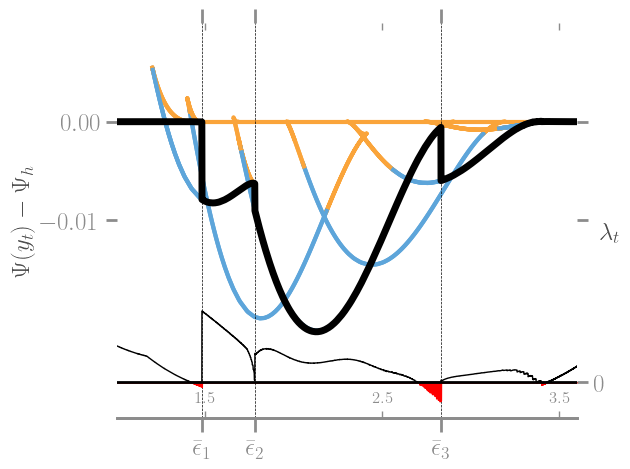

In [441]:
list_auto = np.array([1, 2, 3, 4, 6, 7, 9]) 

fig, axes = plt.subplots(1, 1)

for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    
    data = load_data(os.path.join(_datadir, f'model_2_{ind_p}.txt'))
    
    size_list = np.size(data[:, 0])
    
    stability_current  = data[0, 2]
    load_1 = np.array([data[0, 0]])
    energy_1 = np.array([data[0, 1]])

    for ind_e in range(size_list):
        load_t = data[ind_e, 0]
        if -stability_current==data[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data[ind_e - 1, 0] + data[ind_e, 0])/2
            e_mean = (data[ind_e - 1, 1] + data[ind_e, 1])/2
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                axes.plot(load_1, energy_1, c='C0', linewidth=3)
            elif stability_current==-1:
                axes.plot(load_1, energy_1, c='C1', linewidth=3)
            stability_current  = data[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data[ind_e, 0])
            energy_1 = np.append(energy_1, data[ind_e, 1])


# data_load = np.loadtxt('list_672_load.txt')
file_path = os.path.join(_datadir, f'list_678_load.txt')
data_load = load_data(file_path)
num_points = np.size(data_load, 0)
energy_list = np.zeros(num_points)
rs = 0.5
for ind_pl in range(num_points):
    load = data_load[ind_pl, 0]
    e0 = load*load/(2.0 + load*load) + (rs/2.0)*load*load
    energy_list[ind_pl] = data_load[ind_pl, 1] - e0
axes.plot(data_load[:, 0], energy_list, c='k', linewidth=5)
jump_indices = find_energy_jumps(energy_list)
[axes.axvline(data_load[idx, 0], color='k', linestyle='--', linewidth=0.5) for idx in jump_indices]


axes.set_xticks([point for point in data_load[jump_indices, 0]],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(data_load[jump_indices, 0])+1)]])
axes.tick_params(axis='x', which='major', direction='out', length=10, width=2)

axes.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
axes.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)
axes.set_yticks([-.01, 0])
axes.set_xlim(1., 3.6)
axes.set_ylim(-.03, .01)

axes.set_ylabel('$\Psi(y_t) - \Psi_h$')

as_spectrum = axes.twinx()
file_path = os.path.join(_datadir, f'load_vs_eigenvalue0_model_2.txt')
data_eig = load_data(file_path)
as_spectrum.plot(data_eig[:, 0], np.maximum(data_eig[:, 1], 0), c='k', lw=1)
as_spectrum.fill_between(data_eig[:, 0], np.minimum(data_eig[:, 1], 0), color='r')
as_spectrum.axhline(0, c='k', linestyle='-')
as_spectrum.set_yticks([0])
as_spectrum.set_ylim([-0.003, .03])
# as_spectrum.set_title('Eigenvalue spectrum')
as_spectrum.set_ylabel('$\lambda_t$', rotation="horizontal")
visuals.setspines0()
plt.tight_layout()
plt.savefig(os.path.join(_output, 'model_compliant_energy_kick.png'), dpi=300)


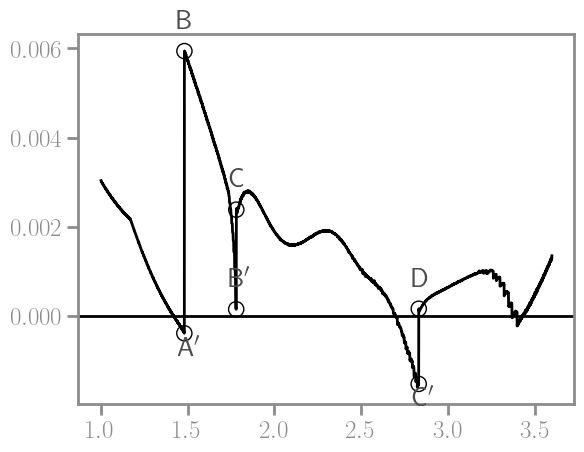

In [431]:
list_auto = np.array([1, 2, 3, 4, 10, 8]) 

fig, axis = plt.subplots(1, 1)

file_path = os.path.join(_datadir, f'load_vs_eigenvalue0_model_2.txt')
data_eig = load_data(file_path)
axis.plot(data_eig[:, 0], data_eig[:, 1], c='k')
axis.axhline(0, c='k', linestyle='-')
index_list = [924, 925, 1499, 1500, 3522, 3523]
list_letter = ['A\'', 'B', 'B\'', 'C', 'C\'', 'D']
delta_x = [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04]
delta_y = [-0.0002, 0.0001, -0.0002, 0.0001, 0.0001, -0.0002]
delta_x = -0.04
delta_y = -0.0005
for ind_j in range(len(index_list)):
    ind = index_list[ind_j]
    axis.scatter(data_eig[ind, 0], data_eig[ind, 1], s=120, facecolors='none', edgecolors='k', zorder=3)
    axis.text(data_eig[ind, 0]+delta_x, data_eig[ind, 1]-np.sign(data_eig[ind, 1])*delta_y, f'$\mathsf {list_letter[ind_j]}$', fontsize=20)
plt.savefig(os.path.join(_output, 'model_compliant_spectrum.png'), dpi=300)


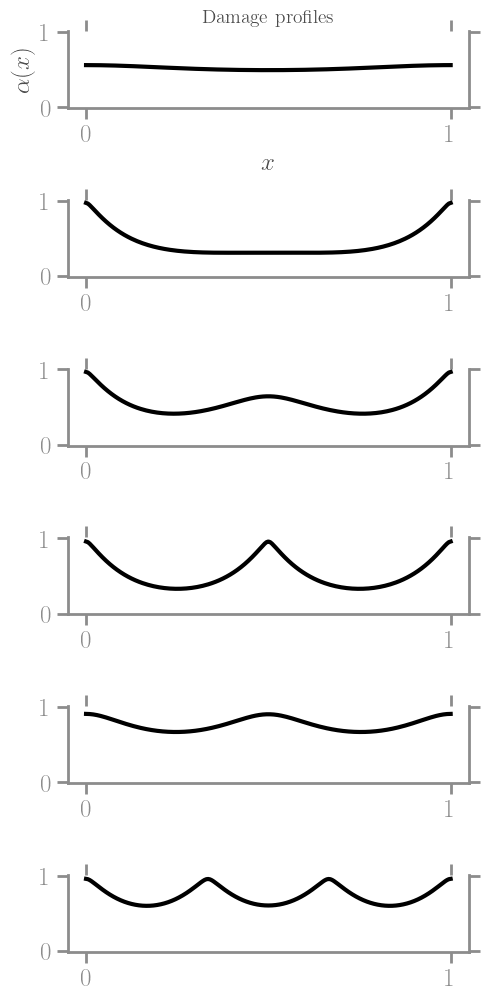

In [432]:
data_jumps = load_data(os.path.join(_datadir, 'jumps_alpha_model_2.txt'))
_cols = len(data_jumps[0, :])

fig, axis = plt.subplots(_cols-1, 1, figsize=(5, 10))

for ind_col in range(1,_cols):
    axis[ind_col-1].plot(data_jumps[:, 0], data_jumps[:, ind_col], c='k', lw=3)
    axis[ind_col-1].set_ylim([-0.01, 1.01])
    axis[ind_col-1].set_yticks([0, 1])
    axis[ind_col-1].set_xticks([0, 1])
    if ind_col == 1:
        axis[0].set_xlabel('$x$')
        axis[0].set_ylabel('$\\alpha(x)$')
# ax_A1.plot(data_jumps[:, 0], data_jumps[:, 1], c='C0')
# ax_A1.text(0.03, 0.01, 'A\'', fontsize=20)
# ##
# ax_A2.plot(data_jumps[:, 0], data_jumps[:, 2], c='C0')
# ax_A2.text(0.03, 0.01, 'B', fontsize=20)
# ##
# ax_A3.plot(data_jumps[:, 0], data_jumps[:, 3], c='C0')
# ax_A3.text(0.03, 0.01, 'B\'', fontsize=20)
# ##
# ax_A4.plot(data_jumps[:, 0], data_jumps[:, 4], c='C0')
# ax_A4.text(0.03, 0.01, 'C', fontsize=20)
# ##
# ax_A5.plot(data_jumps[:, 0], data_jumps[:, 5], c='C0')
# ax_A5.text(0.03, 0.01, 'C\'', fontsize=20)
# ##
# ax_A6.plot(data_jumps[:, 0], data_jumps[:, 6], c='C0')
# ax_A6.text(0.03, 0.01, 'F', fontsize=20)
visuals.setspines2()
plt.tight_layout()
axis[0].set_title('Damage profiles', fontsize=14)

plt.savefig(os.path.join(_output, 'model_compliant_profiles.png'), dpi=300)


## Kicking the door

### Stiff substrate

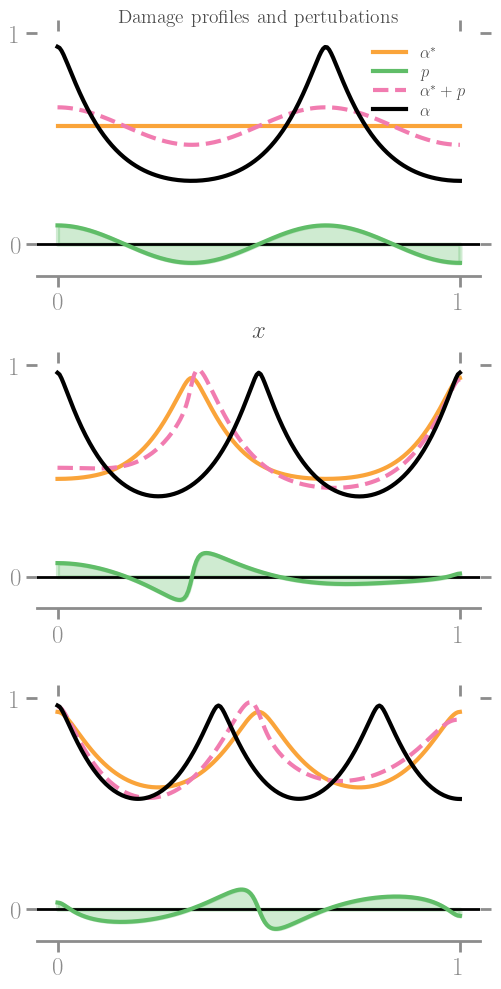

In [433]:

list_auto = np.array([1, 2, 3])

fig, axes = plt.subplots(len(list_auto), 1, figsize=(5, 10))


for index in range(len(list_auto)):
    data_kick = load_data(os.path.join(_datadir, f'kick_alpha_model_1_{list_auto[index]}.txt'))
    
    axes[index].axhline(0, c='k', linestyle='-')
    axes[index].plot(data_kick[:, 0], data_kick[:, 1], linewidth=3, c='C1', label=r'$\alpha^*$')
    axes[index].plot(data_kick[:, 0], data_kick[:, 2], linewidth=3, c='C2', label=r'$p$')
    axes[index].fill_between(data_kick[:, 0], data_kick[:, 2], linewidth=3, color='C2', alpha=.3)
    axes[index].plot(data_kick[:, 0], data_kick[:, 3], linewidth=3, c='C3', ls='--', label=r'$\alpha^*+p$')
    axes[index].plot(data_kick[:, 0], data_kick[:, 4], linewidth=3, c='k', label=r'$\alpha$')
    axes[index].set_ylim([-0.15, 1.01])
    axes[index].set_yticks([0, 1])
    axes[index].set_xticks([0, 1])
    
    
    
axes[0].set_title('Damage profiles and pertubations', fontsize=14)
axes[0].legend()
axes[0].set_xlabel('$x$')
plt.tight_layout()
visuals.setspines0()
plt.savefig(os.path.join(_output, 'model_stiff_kick_profiles.png'), dpi=300)


### Compliant substrate

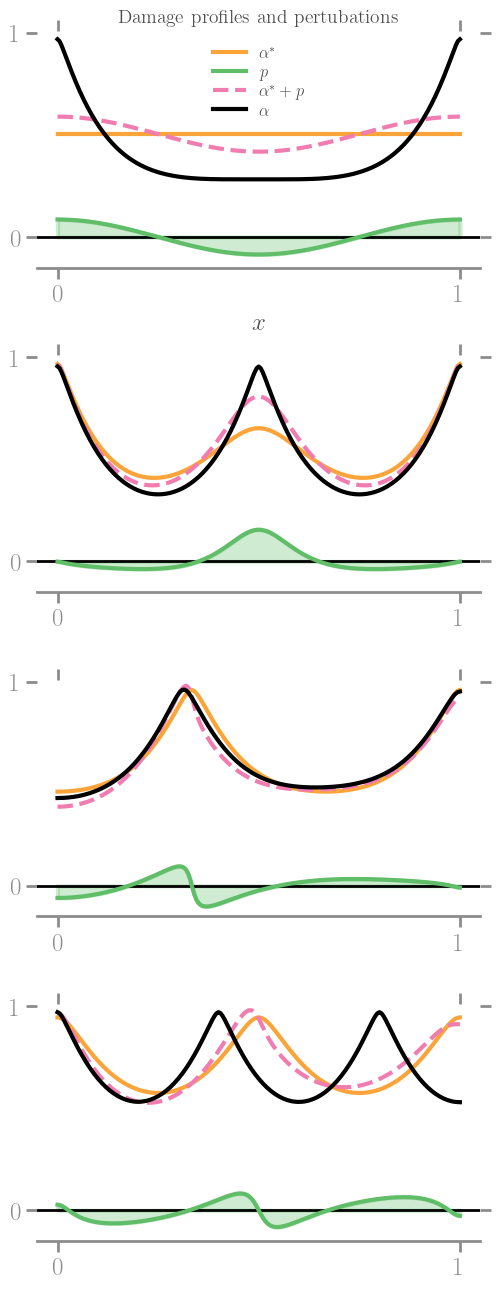

In [434]:

list_auto = np.array([1, 2, 3, 4]) 

fig, axes = plt.subplots(len(list_auto), 1, figsize=(5, 13))


for index in range(len(list_auto)):
    data_kick = load_data(os.path.join(_datadir, f'kick_alpha_model_2_{list_auto[index]}.txt'))
    
    axes[index].axhline(0, c='k', linestyle='-')
    axes[index].plot(data_kick[:, 0], data_kick[:, 1], linewidth=3, c='C1', label=r'$\alpha^*$')
    axes[index].plot(data_kick[:, 0], data_kick[:, 2], linewidth=3, c='C2', label=r'$p$')
    axes[index].fill_between(data_kick[:, 0], data_kick[:, 2], linewidth=3, color='C2', alpha=.3)
    axes[index].plot(data_kick[:, 0], data_kick[:, 3], linewidth=3, c='C3', ls='--', label=r'$\alpha^*+p$')
    axes[index].plot(data_kick[:, 0], data_kick[:, 4], linewidth=3, c='k', label=r'$\alpha$')
    axes[index].set_ylim([-0.15, 1.01])
    axes[index].set_yticks([0, 1])
    axes[index].set_xticks([0, 1])
    
    
    
axes[0].set_title('Damage profiles and pertubations', fontsize=14)
# axes[0].legend(mode = "expand", ncols = 4)
axes[0].legend(loc='upper center')
axes[0].set_xlabel('$x$')
plt.tight_layout()
visuals.setspines0()
plt.savefig(os.path.join(_output, 'model_compliant_kick_profiles.png'), dpi=300)
